In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/weight-height.csv')

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.shape

(10000, 3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-33-b7d9eb69fe5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
<ipython-input-33-b7d9eb69fe5b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: >

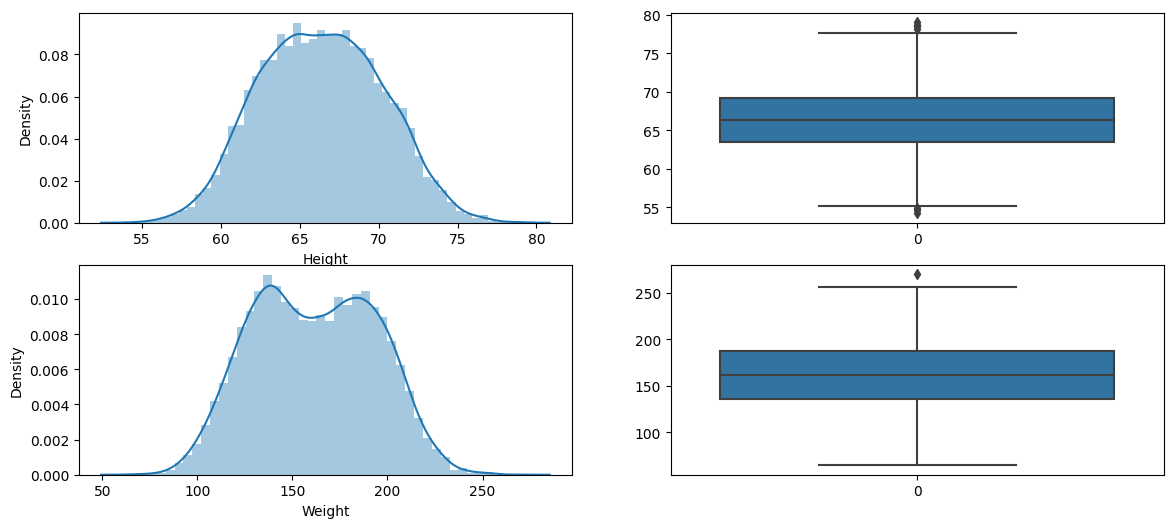

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(df['Weight'])

plt.subplot(2,2,4)
sns.boxplot(df['Weight'])

In [ ]:
upper_limit=df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [ ]:
lower_limit=df["Height"].quantile(0.01)
lower_limit

58.13441158671655

In [ ]:
df[ (df['Height'] >= upper_limit) |( df['Height'] <= lower_limit )]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [ ]:
new_df=df[ (df['Height'] <= upper_limit) & ( df['Height'] >= lower_limit )]

In [ ]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

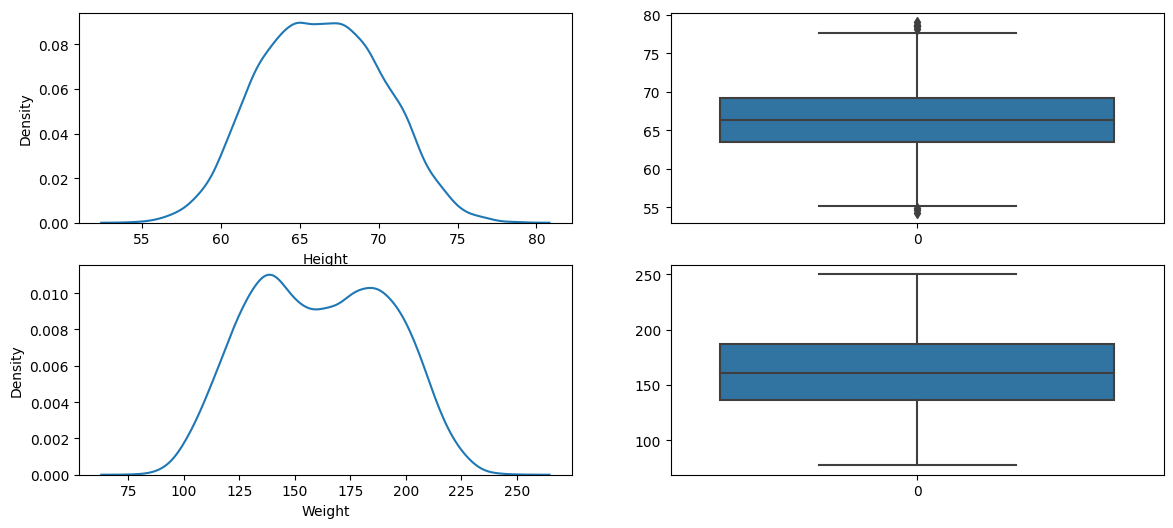

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['Weight'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Weight'])

# Capping in Percentile method is called Winsorization

In [ ]:
new_df_=df.copy()

new_df_['Height']=np.where(df["Height"]>=upper_limit,
                           upper_limit,
                           np.where(df['Height']<=lower_limit,
                                    lower_limit,
                                    df["Height"]
                                    )
                           )

new_df_['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [ ]:
new_df_.shape

(10000, 3)

<Axes: >

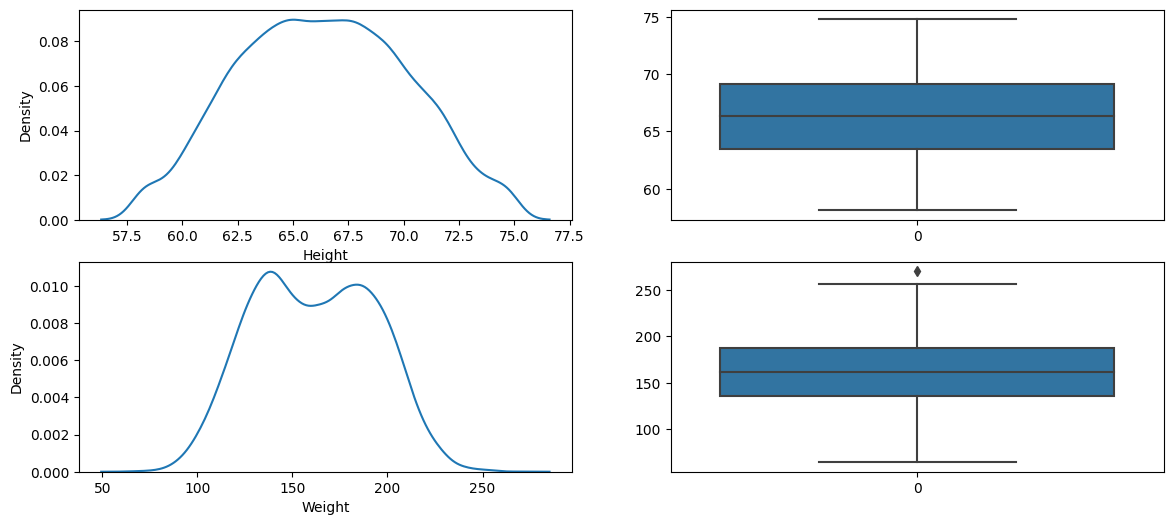

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_['Weight'])

plt.subplot(2,2,4)
sns.boxplot(new_df_['Weight'])